In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.generalized_logistic import Logistic
from hb_mep.utils import (plot_fitted, plot_kde)

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

#### Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

#### Load data and preprocess

In [4]:
data = DataClass(config)
df, data_dict, encoders_dict = data.build()

2023-02-23 22:04:32,404 - hb_mep.data_access.core - INFO - Reading data ....
2023-02-23 22:04:32,409 - hb_mep.data_access.core - INFO - Processing data ...
2023-02-23 22:04:32,420 - hb_mep.utils.utils - INFO - func:build took: 0.02 sec


In [5]:
data_dict.keys()

dict_keys(['num_participants', 'num_segments', 'segments_per_participant', 'total_combinations', 'intensity', 'Biceps', 'participant', 'level'])

In [6]:
encoders_dict.keys()

dict_keys(['participant_encoder', 'segment_encoder'])

#### Initialize model

In [7]:
model = Logistic(config)

#### Run MCMC inference

In [8]:
mcmc, posterior_samples = model.sample(data_dict=data_dict)

2023-02-23 22:04:33,225 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-02-23 22:04:33,226 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-02-23 22:04:33,226 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-02-23 22:04:33,228 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-02-23 22:04:33,229 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-02-23 22:04:33,280 - hb_mep.models.baseline - INFO - Running inference ...

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

#### Diagnostics

In [9]:
mcmc.print_summary()


                                             mean       std    median      5.0%     95.0%     n_eff     r_hat
                                 a[0,0]      0.85      3.93      2.67     -4.10      4.29      2.51      2.18
                                 a[1,0]      2.86      0.06      2.83      2.80      2.96      3.77      1.75
                                 a[2,0]     -2.75      3.68     -1.52     -5.95      0.18     27.01      1.15
                         a_global_scale      2.56      1.13      2.09      0.88      4.47     33.55      1.08
                      a_level_mean[0,0]      2.37      1.94      1.91      0.00      4.63      2.98      1.76
                      a_level_mean[1,0]      2.33      1.41      2.58      0.09      3.85      5.59      1.26
                      a_level_mean[2,0]      1.09      1.01      1.05      0.00      2.05    355.45      1.03
              a_level_mean_global_scale      2.51      1.60      2.60      0.00      4.45     34.48      1.06
         

#### Plot fitted curves

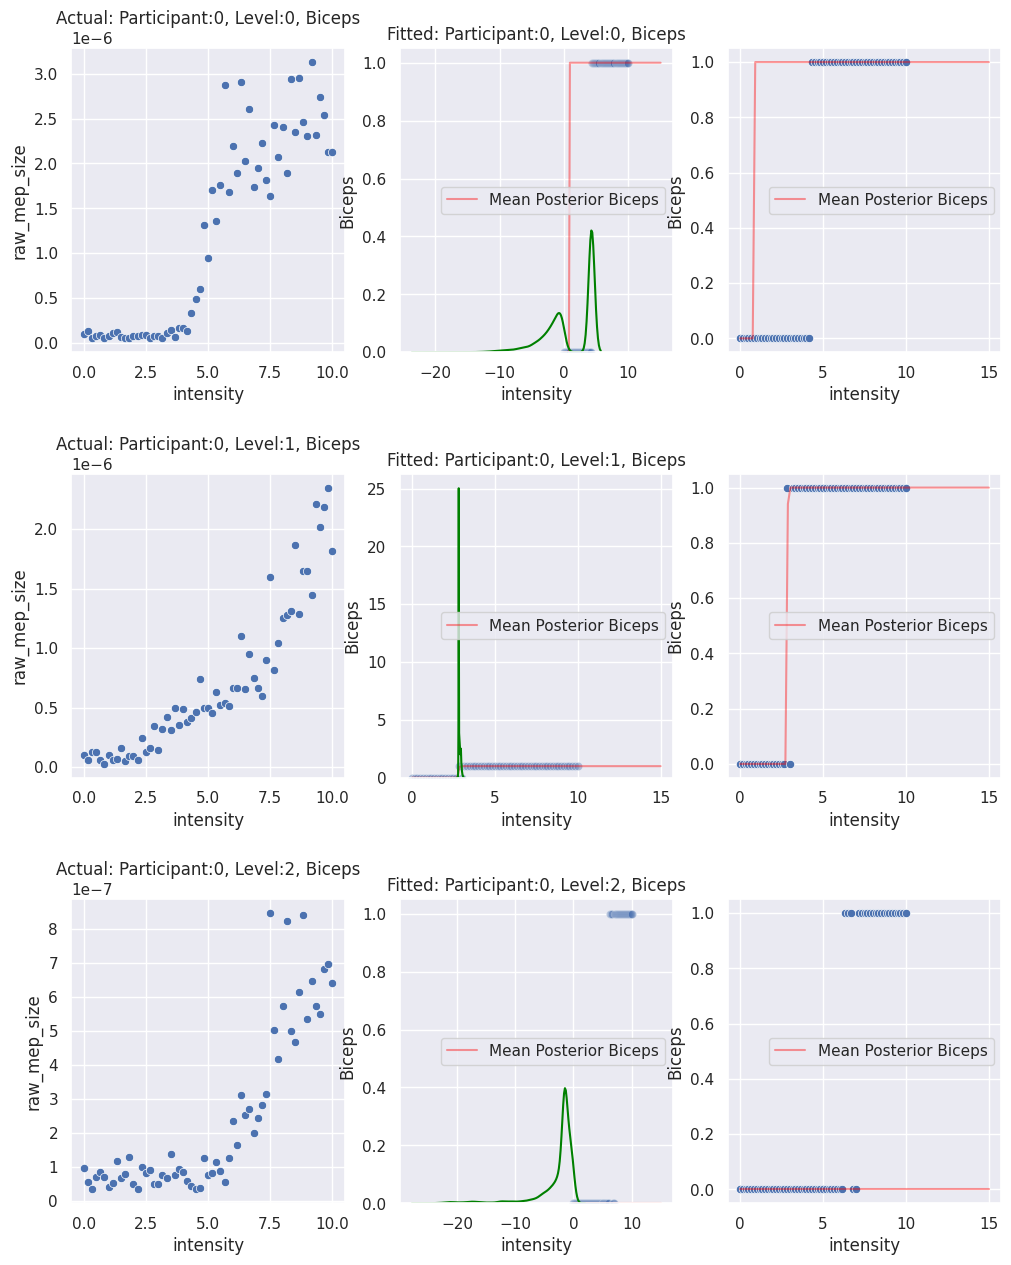

In [12]:
plot_fitted(df=df, data_dict=data_dict, encoders_dict=encoders_dict, posterior_samples=posterior_samples, model_function='sigmoid');

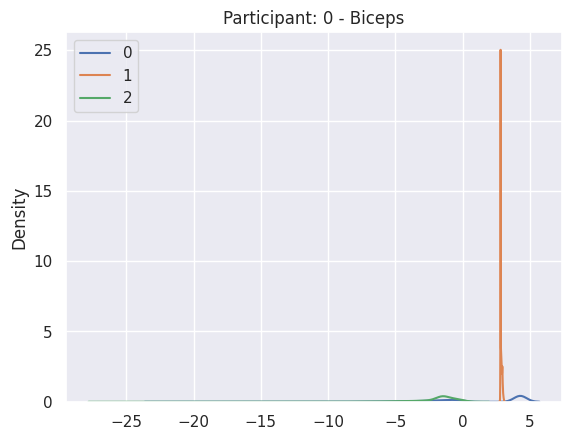

In [13]:
plot_kde(data_dict=data_dict, posterior_samples=posterior_samples);